### Problem statement

Whether the new payment page performs better than the old one.

### Import Package

In [1]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
from numpy import percentile

%matplotlib inline

### Load Data

In [2]:
df = pd.read_excel('./payment_page.xlsx')
df.head(5)

,user_id,timestamp,payment_page,is_convert
0,922696,2017-01-02 13:42:05.379,new_page,0
1,781507,2017-01-02 13:42:15.234,old_page,0
2,737319,2017-01-02 13:42:21.786,old_page,0
3,818377,2017-01-02 13:42:26.641,new_page,0
4,725857,2017-01-02 13:42:27.851,new_page,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   timestamp     294478 non-null  datetime64[ns]
 2   payment_page  294478 non-null  object        
 3   is_convert    294478 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 9.0+ MB


### EDA

In [6]:
df.describe()

,user_id,is_convert
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [11]:
df_make_smy=df.groupby('payment_page').agg({'is_convert':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [12]:
df_make_smy.sort_values('count',ascending=False).head()

,,count,mean
0,new_page,147239,0.118841
1,old_page,147239,0.120478


In [13]:
df_new_page = df[df['payment_page'] == 'new_page']
df_old_page = df[df['payment_page'] == 'old_page']

<AxesSubplot:xlabel='is_convert', ylabel='Count'>

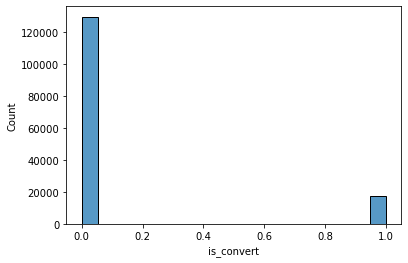

In [16]:
sns.histplot(df_new_page['is_convert'])

<AxesSubplot:xlabel='is_convert', ylabel='Count'>

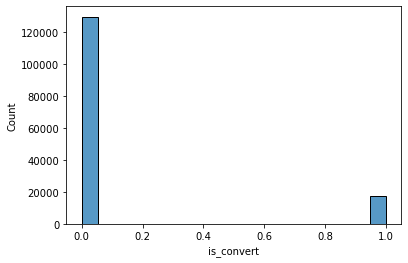

In [15]:
sns.histplot(df_old_page['is_convert'])

### Hypothesis and findings

### Two Sample Test/AB Testing(Old Page vs New Page)

##### It was applied to compare whether the mean difference between the two groups was truly significant or whether it was due to random chance. This helps answer questions such as whether new page payment have a significant meaning toincreasing the conversion

Control sample mean:0.12047759085568362
Control sample std:0.32552029218906237
Control Kurtosis:3.4374369502126414
Treatment sample mean:0.11884079625642663
t-statistic:-1.368333843398843
p-value:0.085604


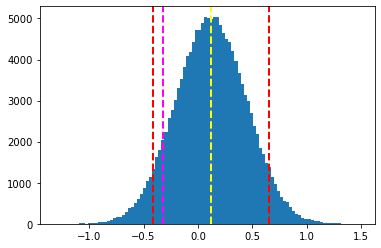

In [23]:
np.random.seed(123)
old_page =df_old_page['is_convert']
new_page = df_new_page['is_convert']
print("Control sample mean:" + str(old_page.mean()))
print("Control sample std:" + str(old_page.std()))
print("Control Kurtosis:" + str(old_page.kurtosis()))
print("Treatment sample mean:" + str(new_page.mean()))

# Independent T-Test
t,p = stats.ttest_ind(new_page, old_page,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(old_page.mean(), old_page.std(), 147239)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, old_page.mean(), old_page.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

The null hypothesis (H0) is that the population mean value for control group category payment page is less than the population mean value for treatment group, and the fact that our sample mean for treatment group is higher than our sample mean for control group can be described randomly in our sample selection.

The alternative hypothesis (H1) is that the average value of the payment page population for the control category that is closest to the actual goal is greater than the average value for the population of treatment group.

$$
\begin{equation}H_{0}: \mu_{1} \le \mu_{2} \\ H_{1}: \mu_{1} > \mu_{2} \end{equation}
$$

\begin{equation}\mu_{1}: Control\end{equation} \begin{equation}\mu_{2}: Treatment\end{equation}

This shows that we do not have enough evidence to say that the control group has a higher mean value than the treatment group, so fail to reject H0

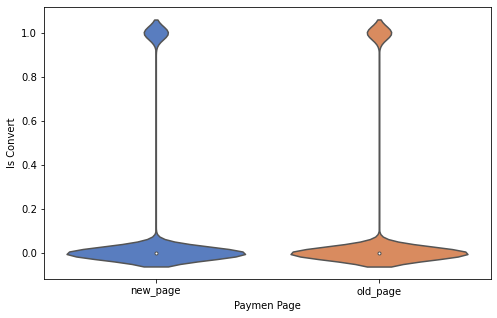

In [36]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='payment_page',
               y='is_convert',
               data=df,
               palette="muted",
               split=True)
plt.xlabel('Paymen Page')
plt.ylabel("Is Convert")
plt.show()

### Recommendation

From the analysis results and the hypothesis that the new page is not better than the old page, I recommend that you provide a new page for the category of users aged 17-25 years, because that age is more concerned with the appearance of a fresh design compared to users aged 25 years.

### Resource

<b>Github<b>: https://github.com/RohMad777/payment_page